#  1: Import Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 

#  2: Load the HR Analytics Data

In [4]:
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#  3: Data Cleaning

In [7]:
#Deleting Redundant Columns:
# List of columns to be deleted
columns_to_delete = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

# Drop the columns
data_cleaned = data.drop(columns=columns_to_delete)


In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Renaming the Columns:

In [9]:
# Dictionary for renaming columns
column_name_mapping = {
    'Age': 'Age',
    'BusinessTravel': 'TravelBusiness',
    'DailyRate' : 'DR' ,
    'DistanceFromHome' : 'Homedistance'  # i have take four coloums to do the task.....
}

# Rename the columns
data_cleaned.rename(columns=column_name_mapping, inplace=True)


In [10]:
data_cleaned.info()  #As we can see the name as been replace by the new name which i have assigned for it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   TravelBusiness            1470 non-null   object
 3   DR                        1470 non-null   int64 
 4   Department                1470 non-null   object
 5   Homedistance              1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

#  Dropping Duplicates:

In [11]:
# Drop duplicate rows
data_cleaned = data_cleaned.drop_duplicates()


# Cleaning Individual Columns (Example: Removing Whitespace from Categorical Columns):

In [12]:
# Clean columns with leading/trailing whitespaces (for object type columns)
data_cleaned['TravelBusiness'] = data_cleaned['TravelBusiness'].str.strip()
data_cleaned['Attrition'] = data_cleaned['Attrition'].str.strip()
data_cleaned['Department'] = data_cleaned['Department'].str.strip()
data_cleaned['EducationField' ] = data_cleaned['EducationField'].str.strip()
data_cleaned['OverTime'] = data_cleaned['OverTime'].str.strip()
data_cleaned['MaritalStatus'] = data_cleaned['MaritalStatus'].str.strip()
data_cleaned['JobRole'] = data_cleaned['JobRole'].str.strip()
data_cleaned['Gender'] = data_cleaned['Gender'].str.strip()



# Remove NaN Values:

In [13]:
# Remove rows with NaN values
data_cleaned = data_cleaned.dropna()


# Additional Transformations (Example: Converting Categorical Columns to Numeric):

In [14]:
# Convert column to binary numeric values (1 for 'Yes', 0 for 'No')
data_cleaned['Attrition'] = data_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)



In [15]:
data_cleaned # I have converted the attrition column to numeric value

,Age,Attrition,TravelBusiness,DR,Department,Homedistance,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [16]:
# Apply one-hot encoding to categorical columns
categorical_columns = ['TravelBusiness', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns)

In [17]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
numerical_columns = ['Age', 'DR', 'Homedistance', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                     'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [18]:
# Handling Imbalanced Data (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_cleaned.drop('Attrition', axis=1), data_cleaned['Attrition'])


In [19]:
# Print the first few rows of the transformed data
print("Transformed Data Sample:")
print(pd.concat([X_resampled, y_resampled], axis=1).head())

Transformed Data Sample:
        Age        DR  Homedistance  Education  EnvironmentSatisfaction  \
0  0.446350  0.742527     -1.010909          2                        2   
1  1.322365 -1.297775     -0.147150          1                        3   
2  0.008343  1.414363     -0.887515          2                        4   
3 -0.429664  1.461466     -0.764121          4                        4   
4 -1.086676 -0.524295     -0.887515          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0    1.383138               3         2                4      -0.108350  ...   
1   -0.240677               2         2                2      -0.291719  ...   
2    1.284725               2         1                3      -0.937654  ...   
3   -0.486709               3         1                3      -0.763634  ...   
4   -1.274014               3         1                2      -0.644858  ...   

   JobRole_Research Director  JobRole_Resea

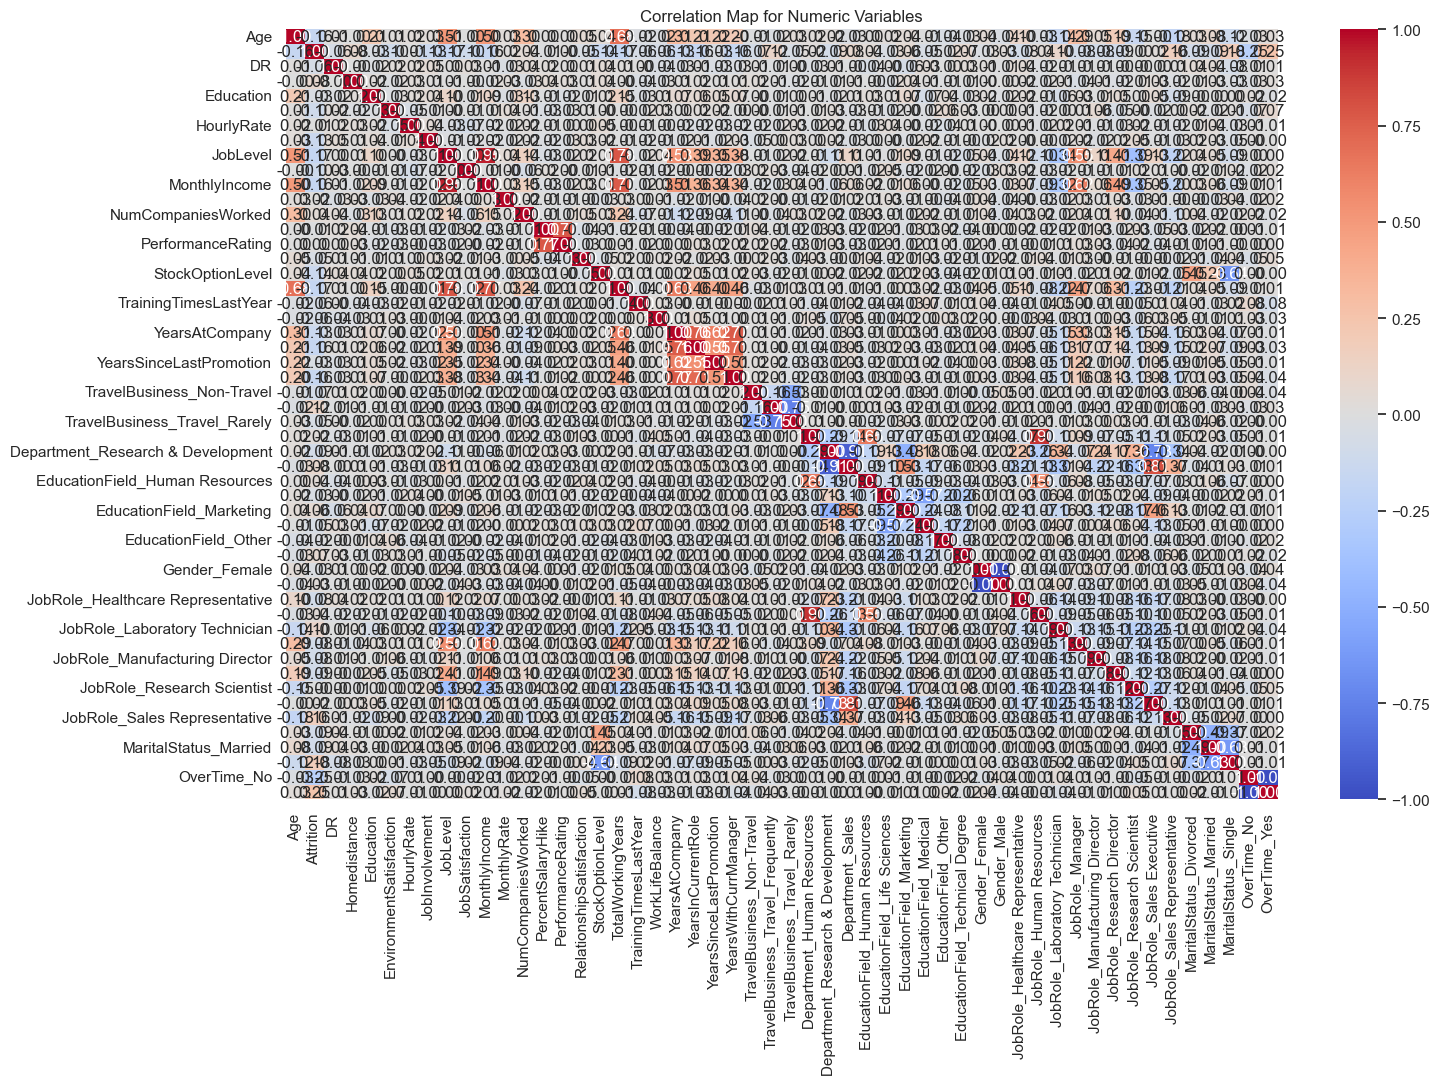

In [22]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Correlation Map for Numeric Variables
plt.figure(figsize=(16, 10))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for Numeric Variables')
plt.show()

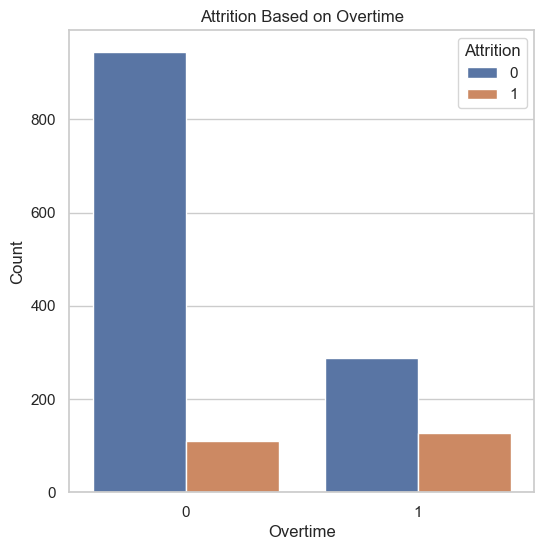

In [24]:
# Attrition Based on Overtime
plt.figure(figsize=(6, 6))
sns.countplot(x='OverTime_Yes', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

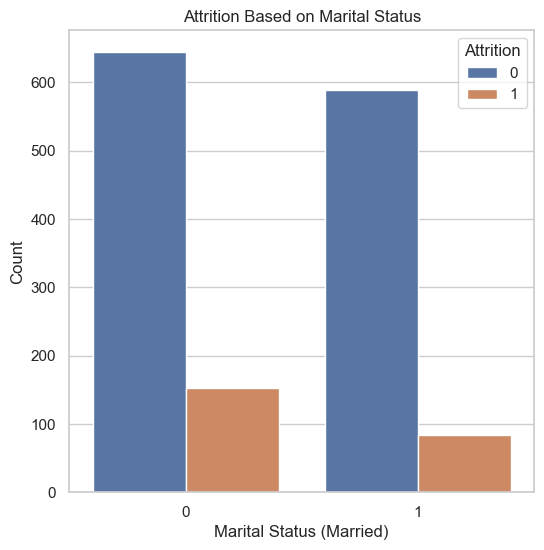

In [25]:
# Attrition Based on Marital Status
plt.figure(figsize=(6, 6))
sns.countplot(x='MaritalStatus_Married', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Marital Status')
plt.xlabel('Marital Status (Married)')
plt.ylabel('Count')
plt.show()

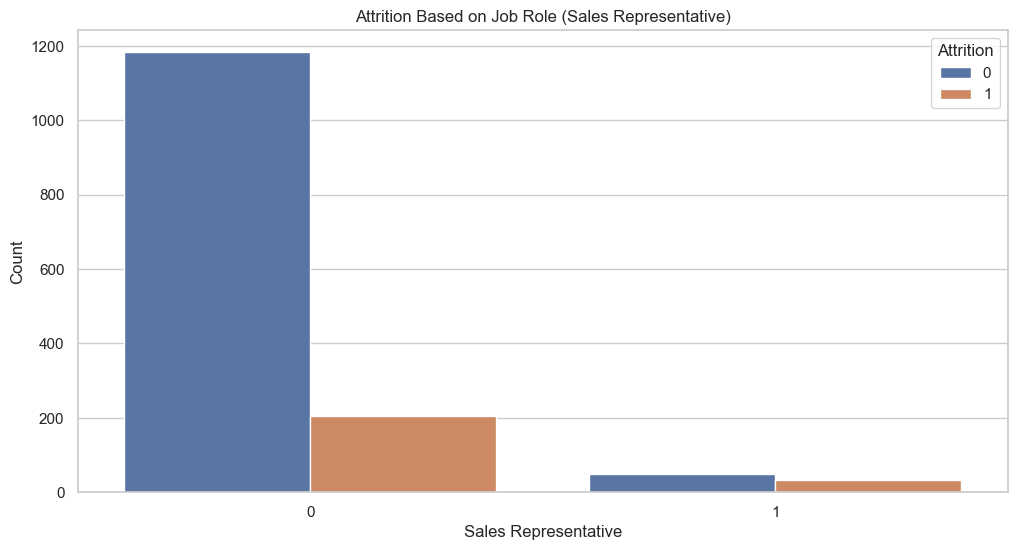

In [26]:

# Attrition Based on Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole_Sales Representative', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Job Role (Sales Representative)')
plt.xlabel('Sales Representative')
plt.ylabel('Count')
plt.show()

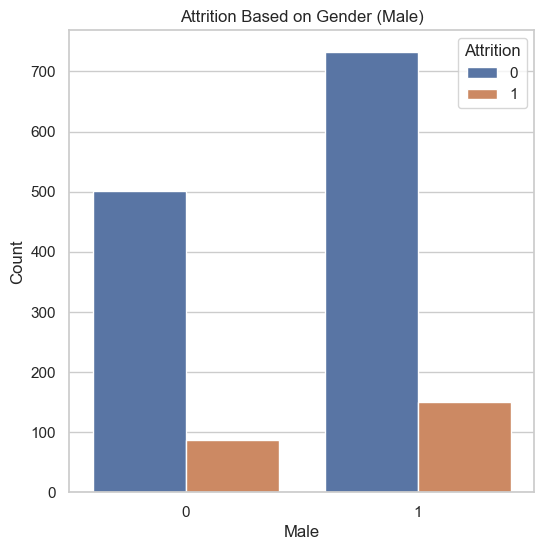

In [27]:
# Attrition Based on Gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender_Male', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Gender (Male)')
plt.xlabel('Male')
plt.ylabel('Count')
plt.show()

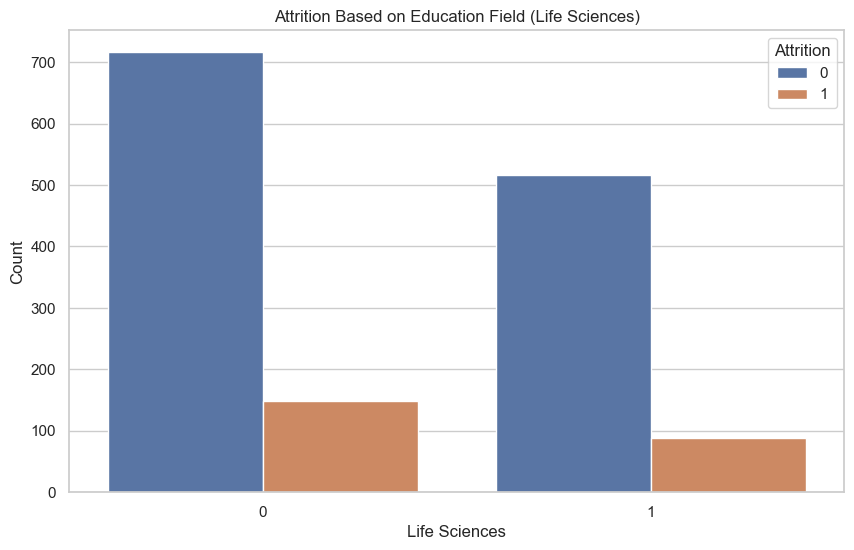

In [28]:
# Attrition Based on Education Field
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField_Life Sciences', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Education Field (Life Sciences)')
plt.xlabel('Life Sciences')
plt.ylabel('Count')
plt.show()


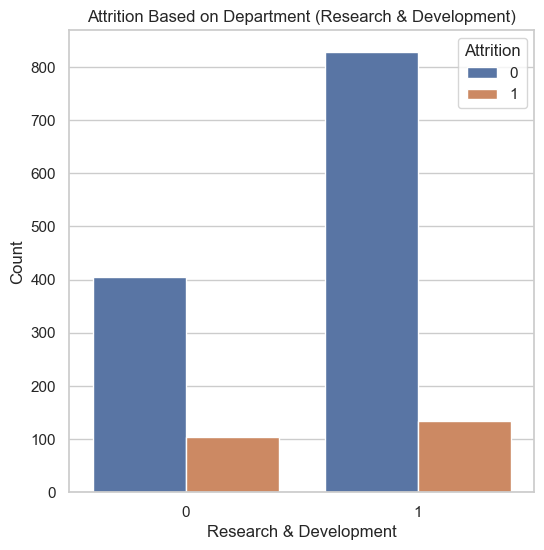

In [29]:
# Attrition Based on Department
plt.figure(figsize=(6, 6))
sns.countplot(x='Department_Research & Development', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Department (Research & Development)')
plt.xlabel('Research & Development')
plt.ylabel('Count')
plt.show()

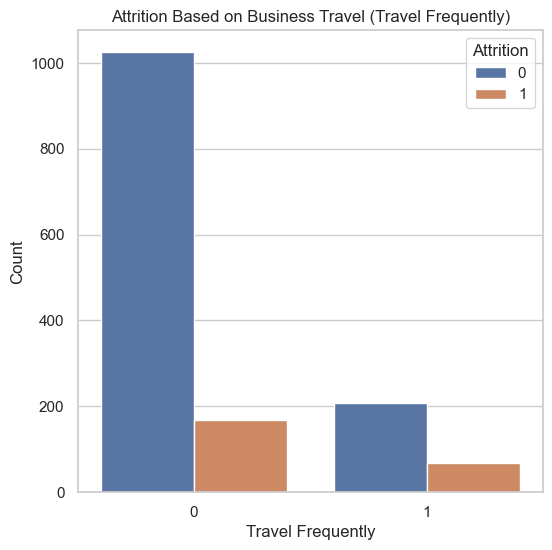

In [30]:
# Attrition Based on Business Travel
plt.figure(figsize=(6, 6))
sns.countplot(x='TravelBusiness_Travel_Frequently', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Business Travel (Travel Frequently)')
plt.xlabel('Travel Frequently')
plt.ylabel('Count')
plt.show()

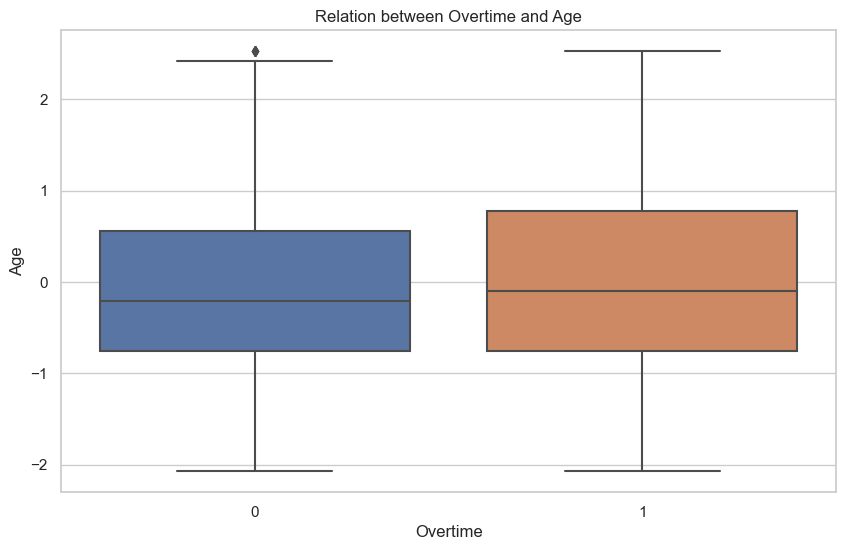

In [31]:
# Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime_Yes', y='Age', data=data_cleaned)
plt.title('Relation between Overtime and Age')
plt.xlabel('Overtime')
plt.ylabel('Age')
plt.show()

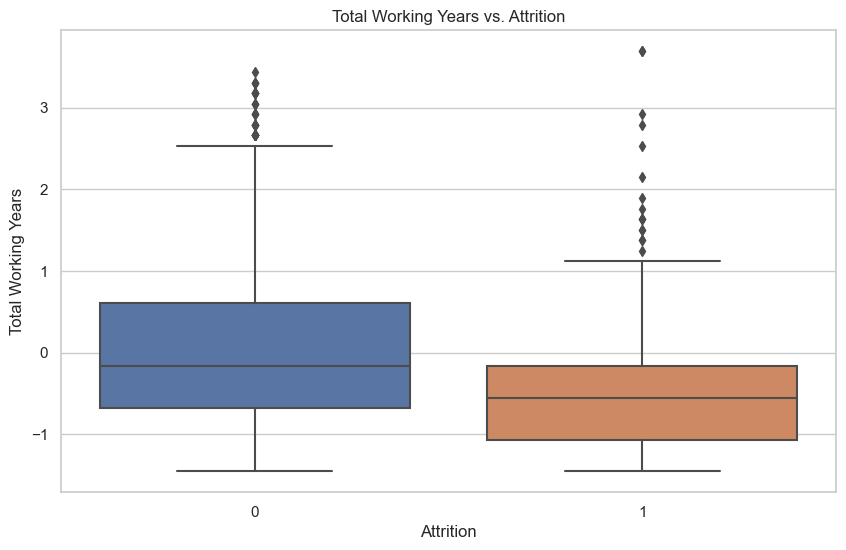

In [32]:
# Attrition Based on Total Working Years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data_cleaned)
plt.title('Total Working Years vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

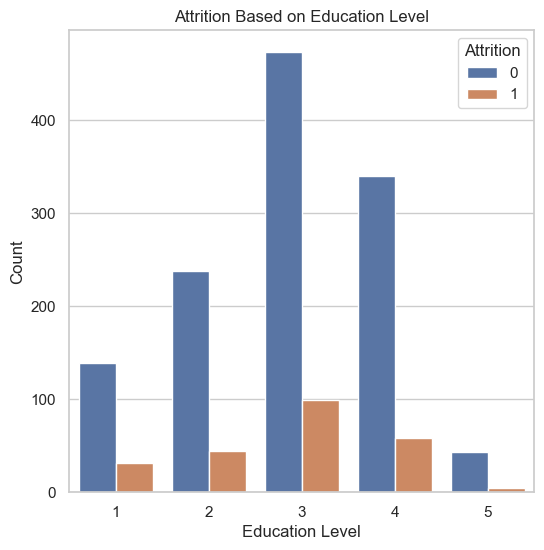

In [33]:
# Attrition Based on Education Level
plt.figure(figsize=(6, 6))
sns.countplot(x='Education', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

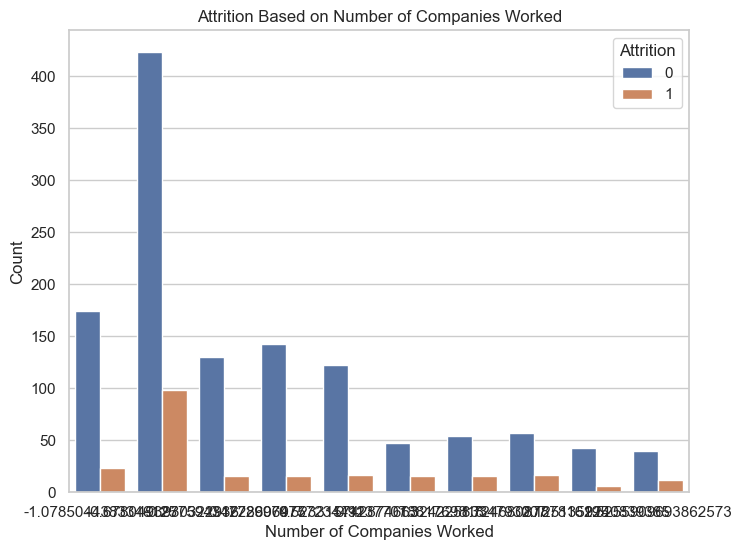

In [34]:
# Attrition Based on Number of Companies Worked
plt.figure(figsize=(8, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.show()

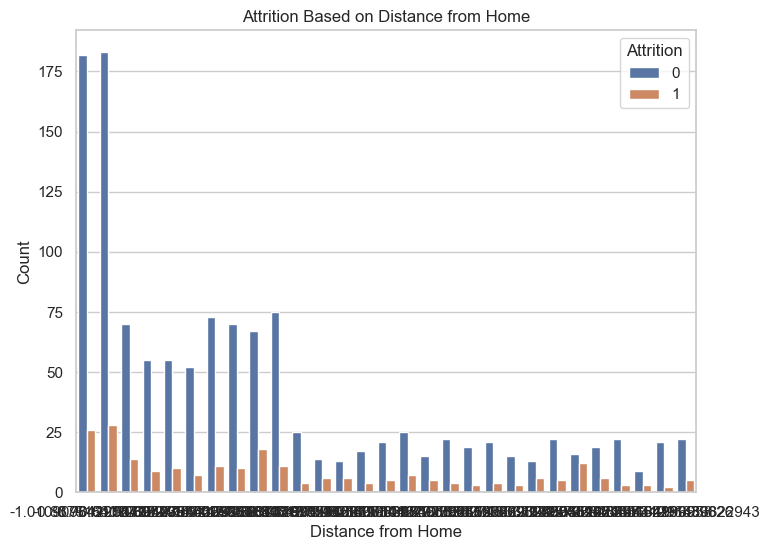

In [35]:
# Attrition Based on Distance from Home
plt.figure(figsize=(8, 6))
sns.countplot(x='Homedistance', hue='Attrition', data=data_cleaned)
plt.title('Attrition Based on Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.show()